                                                                NLP PROJECT

1. Importing libraries

In [2]:
import numpy as np
import pandas as pd

2. reading the data

In [6]:
yelp = pd.read_csv('/Users/bijit/Downloads/yelp.xls')

In [8]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [10]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [12]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


3. making another column of text length

In [14]:
yelp['text length'] = yelp['text'].apply(len)

4. importing visualization libraries

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

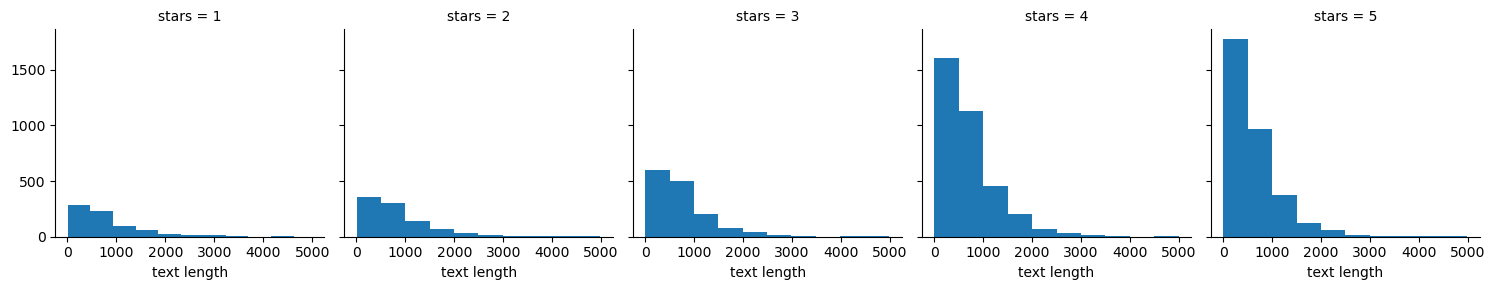

In [22]:
a = sns.FacetGrid(yelp, col= 'stars')
a.map(plt.hist,'text length')

<Axes: xlabel='stars', ylabel='text length'>

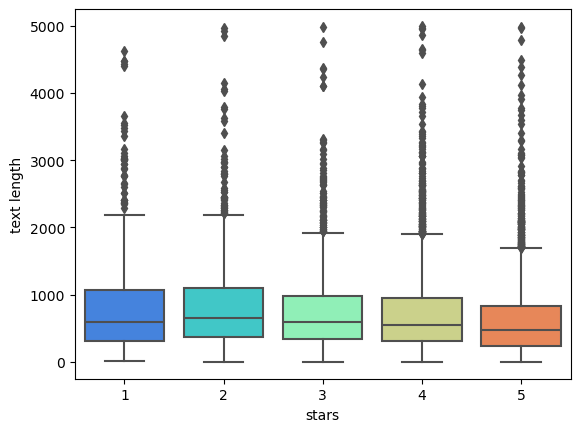

In [26]:
sns.boxplot(x= 'stars', y = 'text length', data = yelp, palette = 'rainbow')

<Axes: xlabel='stars', ylabel='count'>

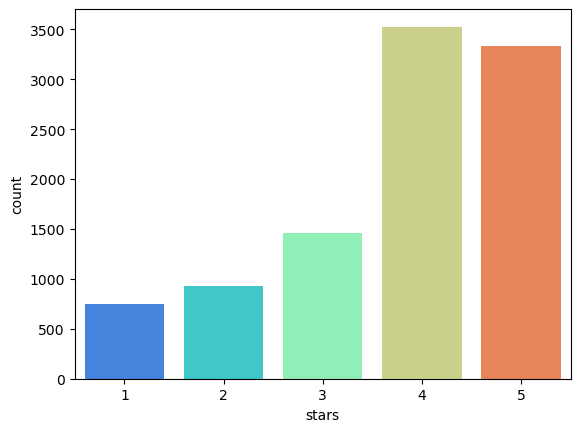

In [28]:
sns.countplot(data= yelp, x = 'stars', palette = 'rainbow')

5. selecting reviews which were only 1 or 5 stars

In [36]:
yelp_class = yelp[(yelp['stars'] == 1)  | (yelp['stars'] == 5)]

6. feature(text) and target label(stars)

In [38]:
X = yelp_class['text']
y = yelp_class['stars']

7. importing count vectorizer


In [40]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

8. vectorizing the data

In [42]:
X = cv.fit_transform(X)

9. importing train test split

In [44]:
from sklearn.model_selection import train_test_split

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 101)

10. importing MultinomialNB for classification

In [54]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [56]:
nb.fit(X_train,y_train)

MultinomialNB()

11. predicting using MultinomialNB

In [58]:
predictions = nb.predict(X_test)

12. importing metrics for checking results

In [60]:
from sklearn.metrics import classification_report,confusion_matrix

In [62]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



In [64]:
print(confusion_matrix(y_test,predictions))

[[159  69]
 [ 22 976]]


COUNT VECTORIZER AND MULTINOMIAL NB GAVE A GOOD RESULT IN PREDICTIONS.

NOW WE WILL USE THE PIPELINE FEATURE FOR PREDICTIONS

1. importing TfidfTransformer

In [66]:
from sklearn.feature_extraction.text import TfidfTransformer

2. importing Pipeline

In [68]:
from sklearn.pipeline import Pipeline

In [70]:
pipeline = Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier', MultinomialNB())
])

3. using train test split as the previous training data is already vectorized

In [72]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

pipeline goes through 3 steps

In [74]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

4. predicting using pipeline

In [76]:
pred = pipeline.predict(X_test)

5. checking metrics

In [80]:
print(confusion_matrix(y_test,pred))

[[  0 228]
 [  0 998]]


In [82]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



C:\Users\bijit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bijit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bijit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


USING TF-IDF TRANSFORMER MADE THE RESULTS WORSE

LETS USE RANDOM FORESTS AS ANOTHER CLASSIFIER

1. importing random forest classifier and using it in pipeline

In [84]:
from sklearn.ensemble import RandomForestClassifier
pipeline = Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
])

In [86]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

Pipeline will use Random Forests instead of MultinomialNB

In [88]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

2. predictions using new classifier

In [90]:
pred_forest = pipeline.predict(X_test)

3. calculating metrics

In [92]:
print(confusion_matrix(y_test,pred_forest))

[[ 38 190]
 [  0 998]]


In [96]:
print(classification_report(y_test,pred_forest))

              precision    recall  f1-score   support

           1       1.00      0.17      0.29       228
           5       0.84      1.00      0.91       998

    accuracy                           0.85      1226
   macro avg       0.92      0.58      0.60      1226
weighted avg       0.87      0.85      0.80      1226



RANDOM FORESTS MADE BETTER PREDICTIONS 